In [1]:
# Data Preprocessing 
# Build The RNN 
# Making the prediction & Visualization

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
pwd

'C:\\Users\\Owner'

In [4]:
data = pd.read_csv(r"C:\\Users\\Owner\Desktop\aapl.csv")
data                    

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2008,7.116786,7.152143,6.876786,6.958571,6.013175,1079178800
1,1/3/2008,6.978929,7.049643,6.881786,6.961786,6.015953,842066400
2,1/4/2008,6.837500,6.892857,6.388928,6.430357,5.556723,1455832000
3,1/7/2008,6.473214,6.557143,6.079643,6.344285,5.482346,2072193200
4,1/8/2008,6.433571,6.516428,6.100000,6.116071,5.285137,1523816000
...,...,...,...,...,...,...,...
3015,12/23/2019,70.132500,71.062500,70.092499,71.000000,70.513535,98572000
3016,12/24/2019,71.172501,71.222504,70.730003,71.067497,70.580566,48478800
3017,12/26/2019,71.205002,72.495003,71.175003,72.477501,71.980911,93121200
3018,12/27/2019,72.779999,73.492500,72.029999,72.449997,71.953598,146266000


In [5]:
data_training = data[data['Date'] < '2019-01-01'].copy()
data_testing = data[data['Date'] >= '2019-01-01'].copy()

In [6]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.06121168, 0.05985455, 0.05898466, 0.05943621, 0.31056649],
       [0.05924073, 0.05840196, 0.05905687, 0.05948208, 0.23929877],
       [0.05721872, 0.05618006, 0.05193847, 0.05189968, 0.4237753 ],
       ...,
       [0.97748224, 0.98586392, 0.98765119, 0.99425721, 0.01419196],
       [1.        , 1.        , 1.        , 0.99386478, 0.03016544],
       [0.99406672, 0.99546512, 0.98952876, 1.        , 0.02951874]])

In [8]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train.shape

(1175, 60, 5)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [11]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [12]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
37/37 [==============================] - 5s 137ms/step - loss: 0.0292
Epoch 2/150
37/37 [==============================] - 5s 134ms/step - loss: 0.0055
Epoch 3/150
37/37 [==============================] - 5s 134ms/step - loss: 0.0033
Epoch 4/150
37/37 [==============================] - 5s 129ms/step - loss: 0.0030
Epoch 5/150
37/37 [==============================] - 5s 130ms/step - loss: 0.0032
Epoch 6/150
37/37 [==============================] - 5s 129ms/step - loss: 0.0029
Epoch 7/150
37/37 [==============================] - 5s 136ms/step - loss: 0.0029
Epoch 8/150
37/37 [==============================] - 5s 134ms/step - loss: 0.0027
Epoch 9/150
37/37 [==============================] - 5s 131ms/step - loss: 0.0027
Epoch 10/150
37/37 [==============================] - 5s 135ms/step - loss: 0.0023
Epoch 11/150
37/37 [==============================] - 5s 141ms/step - loss: 0.0026
Epoch 12/150
37/37 [==============================] - 5s 141ms/step - loss: 0.0022
Epoch 13/150


In [16]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
41,3/3/2008,4.444286,4.499286,4.214286,4.347500,3.756845,1593043200
42,3/4/2008,4.356786,4.460000,4.300000,4.450714,3.846035,1785383600
43,3/5/2008,4.413571,4.469285,4.366071,4.446072,3.842025,1221836000
44,3/6/2008,4.450357,4.553571,4.314643,4.318929,3.732156,1473698800
45,3/7/2008,4.300357,4.392143,4.251786,4.366071,3.772892,1230462800


In [39]:
past_60_days = data_testing.tail(60)

In [40]:
df = past_60_days.append(data_testing, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,50.202499,50.349998,49.602501,50.005001,101354400
1,49.799999,50.377499,49.702499,50.310001,82312000
2,50.462502,50.932499,50.389999,50.807499,71588400
3,50.827499,51.097500,50.427502,50.437500,80767200
4,50.612499,51.000000,50.549999,50.825001,70380800


In [42]:
inputs = scaler.transform(df)
inputs

array([[0.67720901, 0.67203496, 0.67607707, 0.67362064, 0.01666658],
       [0.67145446, 0.67242469, 0.67752135, 0.67797236, 0.0109431 ],
       [0.68092628, 0.6802899 , 0.68745099, 0.68507064, 0.00771996],
       ...,
       [0.74579898, 0.741263  , 0.74980916, 0.74449668, 0.00884575],
       [0.74772905, 0.74133388, 0.74421245, 0.74068003, 0.01668269],
       [0.74901579, 0.7541591 , 0.75688625, 0.75904999, 0.01743458]])

In [43]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])
    
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((1785, 60, 5), (1785,))

In [44]:
x_test.shape

(1785, 60, 5)

In [45]:
y_pred = regressor.predict(x_test)

In [46]:
scaler.scale_

array([1.42970208e-02, 1.41715465e-02, 1.44431149e-02, 1.42679527e-02,
       3.00565123e-10])

In [47]:
scale = 1 / 1.42970208e-02
scale

69.94464189350553

In [48]:
y_pred = y_pred * scale 
y_test = y_test * scale

In [49]:
y_pred.shape

(1785, 1)

In [50]:
y_test.shape

(1785,)

In [36]:
y_pred[1725:]

array([[43.32011 ],
       [43.234653],
       [43.026146],
       [42.995815],
       [43.081776],
       [43.20877 ],
       [43.431065],
       [43.622734],
       [43.709206],
       [43.76236 ],
       [43.743614],
       [43.75367 ],
       [43.985233],
       [44.241188],
       [44.407726],
       [44.483017],
       [44.569   ],
       [44.550472],
       [44.69897 ],
       [44.653683],
       [44.195248],
       [43.310104],
       [42.39375 ],
       [41.68028 ],
       [41.602016],
       [41.904316],
       [42.22248 ],
       [42.678574],
       [42.98258 ],
       [43.04346 ],
       [43.181683],
       [43.783165],
       [44.37035 ],
       [44.846767],
       [45.12995 ],
       [44.83484 ],
       [44.42    ],
       [44.082382],
       [43.856487],
       [43.947643],
       [44.21467 ],
       [44.268906],
       [44.363106],
       [44.729782],
       [45.17009 ],
       [45.45156 ],
       [45.58165 ],
       [45.949997],
       [46.58948 ],
       [46.696297],


In [51]:
y_test[1725:]

array([47.36714193, 46.96464193, 47.62714493, 47.99214193, 47.77714193,
       48.18714193, 48.31214193, 48.17714393, 48.16464293, 48.61214093,
       48.07714093, 49.27964492, 49.08214293, 49.38714292, 49.03464193,
       49.27964492, 49.35464192, 51.26964292, 50.63964092, 48.54714293,
       46.66214393, 46.24214193, 46.01714393, 47.21464193, 47.48964393,
       47.06964193, 47.41964393, 47.95464393, 48.02964493, 48.23464293,
       49.81964192, 49.88464392, 50.41214392, 50.46214392, 49.52214092,
       48.62964293, 49.12964293, 48.18964493, 49.28964292, 49.70464392,
       48.77214093, 49.26214292, 50.16464292, 50.67714392, 50.87464192,
       50.62964292, 51.68214492, 53.36464392, 52.16464292, 51.59714192,
       52.15464492, 52.42964192, 52.66714192, 52.50964392, 51.90214192,
       52.42214292, 51.80214392, 52.16464292, 52.29964092, 52.38964092])

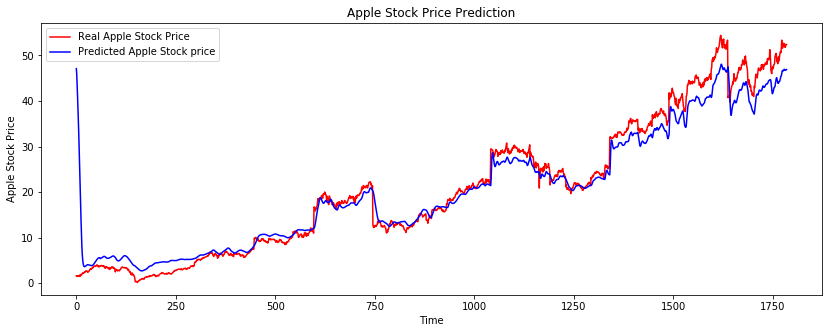

In [52]:
plt.figure(figsize = (14,5))
plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()